In [1]:
labels = []
docs = []

with open('dataset.txt', 'r') as f:
  temp = ""
  for line in f:
      if len(line) < 2 :
          continue
      if line.startswith("Cat"):
          if len(labels) != 0:
              docs.append(temp)
              temp = ""
          labels.append(line.split()[1])
      else:
          temp += line
  docs.append(temp)

In [2]:
print(labels[2])
print("---")
print(docs[2])

Spam
---
No prescription needed! Get free Viagra pills delivered to your door. Limited time offer.



In [3]:
int_label = [1,0]

In [4]:
def clean(data):

  tokens = data.split()
  translation_table = str.maketrans('', '', "\"#$%&'()*+,-/:;<=>?@[\]^_`{|}~،؟!❊#$٪^&*)(ـ+=-؛:❊{}.")
  tokens = [w.translate(translation_table) for w in tokens]
  # tokens = [word.lower() for word in tokens] 
  return ' '.join(tokens)


In [5]:
num_classes = 2
docs = [clean(doc) for doc in docs]

In [13]:
new_labels=[]
for i in labels:
    if i == "Spam":
        new_labels.append(1)
    else:
        new_labels.append(0)


In [15]:
labels = new_labels

In [10]:
# imports 
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, GRU, Embedding
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from keras.models import load_model


In [16]:
labels[1]

0

In [17]:
labels= to_categorical(labels, num_classes=num_classes)

In [24]:
sentences_train, sentences_test, y_train, y_test = train_test_split(
   docs, labels, test_size=0.20, random_state=1000)

sentences_test, sentences_valid, y_test, y_valid = train_test_split(
   sentences_test, y_test, test_size=0.5, random_state=1000)

In [25]:
maxlen = 50

In [26]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(docs)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
X_val = tokenizer.texts_to_sequences(sentences_valid)

vocab_size = len(tokenizer.word_index) + 1 

In [27]:

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)


In [ ]:

embedding_dim = 50

model = Sequential()
model.add(Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen,
                           trainable=True))

model.add(Bidirectional(GRU(150, dropout=0.2,  return_sequences=True)))
model.add(Bidirectional(GRU(100, dropout=0.2,  return_sequences=True)))
model.add(Bidirectional(GRU(50, dropout=0.2,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

In [30]:

checkpoint_path = 'model-{epoch:03d}-{val_accuracy:03f}.keras'

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only=True)

In [35]:
import tensorflow as tf

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [33]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_val, y_valid),
                    batch_size=100,
                    callbacks=[cp_callback])

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step - accuracy: 0.5714 - loss: 0.6929 - val_accuracy: 0.0000e+00 - val_loss: 0.7700
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.6429 - loss: 0.6726 - val_accuracy: 0.0000e+00 - val_loss: 0.8561
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.6429 - loss: 0.6524 - val_accuracy: 0.0000e+00 - val_loss: 0.9627
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.6429 - loss: 0.6391 - val_accuracy: 0.0000e+00 - val_loss: 1.0831
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.6429 - loss: 0.6370 - val_accuracy: 0.0000e+00 - val_loss: 1.1811
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.6429 - loss: 0.6397 - val_accuracy: 0.0000e+00 - val_loss: 1.2178
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.6429 - loss: 0.6367 - val_accuracy: 0.0000e+00 - val_loss: 1.1926
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.6429 - loss: 0.6146 - val_a

In [34]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

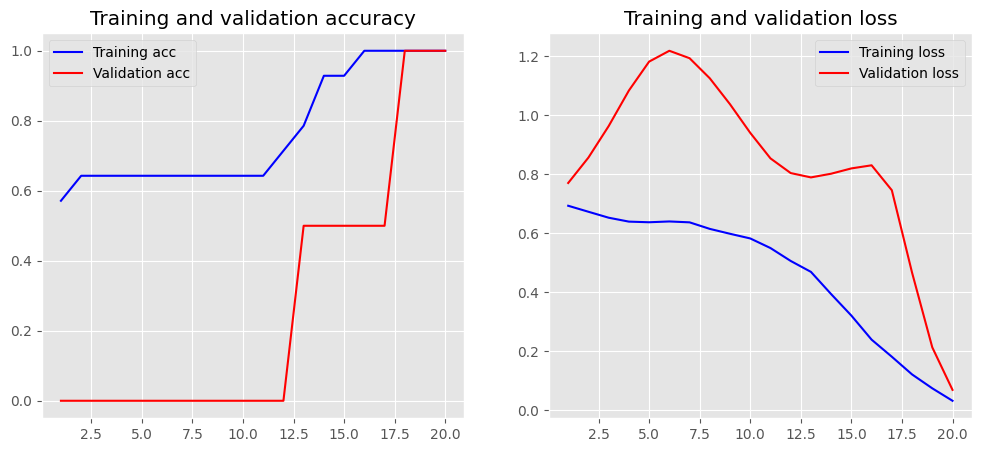

In [36]:
plot_history(history)

In [38]:
model = load_model('model-018-1.000000.keras')

In [39]:
preds = model.evaluate(X_test, y_test, verbose=0)

In [40]:
preds

[0.22561627626419067, 1.0]

## testing with one sample spam message 

In [47]:
tests = ["hey i was looking for you today call me when you where free",
         "Congratulations! You've been selected as a lucky winner of our exclusive offer. Click here to reveal your surprise gift"]
tests = [clean(test) for test in tests]

In [48]:
test_x = tokenizer.texts_to_sequences(tests)

In [49]:
test_x = pad_sequences(test_x, padding='post', maxlen=maxlen)

In [50]:
pred_test = model.predict(test_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [51]:
for i in pred_test:
    print(i)

[0.99306434 0.00693563]
[0.15531078 0.84468925]
